# Euler method

Euler’s method of solution is conceptually simple. Its basis is the truncated Taylor
series of y about x:

<img src="files/trunc_taylor.jpg">


Because previous equation predicts y at x + h from the information available at x, it can be
used to move the solution forward in steps of h, starting with the given initial values
of x and y.

The error in  previous Eq.  is caused by truncation of the Taylor series is given by:

<img src="files/error.jpg">



In [3]:
## module euler
'''X,Y = integrate(F,x,y,xStop,h).
Euler’s method for solving the
initial value problem {y}’ = {F(x,{y})}, where
{y} = {y[0],y[1],...y[n-1]}.
x,y = initial conditions
xStop = terminal value of x
h = increment of x used in integration
F = user-supplied function that returns the
array F(x,y) = {y’[0],y’[1],...,y’[n-1]}.
'''

import numpy as np
def integrate(F,x,y,xStop,h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h, xStop - x)
        # TODO: estimate the value of y using the truncated taylor series
        y = y + h*F(x,y)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

We use this function to print X and Y obtained from numerical integration. The
amount of data is controlled by the parameter freq . For example, if freq = 5 , ev-
ery fifth integration step would be displayed. If freq = 0 , only the initial and final
values will be shown.

In [4]:
## module printSoln
'''printSoln(X,Y,freq).
Prints X and Y returned from the differential
equation solvers using printout frequency ’freq’.
freq = n prints every nth step.
freq = 0 prints initial and final values only.
'''

def printSoln(X, Y, frec):
    
    def printHead(n):
        print("\n       x   ")
        for i in range(n):
            print("    y[", i, "] ", end = "")
        print()
        
    def printLine(x,y,n):
        print("{:13.4e}".format(x),end=" ")
        for i in range(n):
            print("{:13.4e}".format(y[i]),end=" ")
        print()
        
    m = len(Y)
    try: n = len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i], Y[i], n)
    if i != m-1: printLine(X[m-1],Y[m-1],n)
        


Integrate the initial value problem

<img src="files/diff_eq_ej1.jpg">

from x = 0 to 2 with Euler’s method using h = 0.05. Plot the computed y together
with the analytical solution,

<img src="files/diff_eq_ej2.jpg">

Solution. With the notation y_0 = y and y_1 = y' the equivalent first-order equations
and the initial conditions are:

<img src="files/diff_eq_ej3.jpg">


Here is a program that uses the function euler :

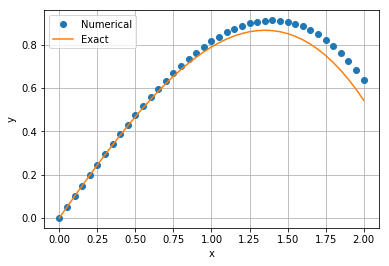

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F

x = 0.0 # Start of integration
xStop = 2.0 # End of integration
y = np.array([0.0, 1.0]) # Initial values of {y}
h = 0.05 # Step size

X,Y = integrate(F,x,y,xStop,h)
yExact = 100.0*X - 5.0*X**2 + 990.0*(np.exp(-0.1*X) - 1.0)
plt.plot(X,Y[:,0],'o',X,yExact,'-')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(('Numerical','Exact'),loc=0)
plt.show()